In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/raw_data_v0.1 - master.csv')

In [ ]:
df

,Timestamp,Verified Email,Full Name,WhatsApp Number,Email Id,College Full Name,Branch Name,Year Of Pass - out,College District,College State
0,7/28/2025 19:30:55,ead_0001,Priyamvadha,mnu_0001,ead_0001,Swarna Bharathi Institute of science and techn...,DATA SCIENCE,2026 ( Present 4th Year ),Khammam,Telangana
1,7/28/2025 19:30:55,ead_0002,Sandeep,mnu_0002,ead_0002,Lovely Professional University,OTHERS,2025 ( RECENT PASS-OUTS ),Phagwara,Punjab
2,7/28/2025 19:30:59,ead_0003,Mohit,mnu_0003,ead_0003,Lovely Professional University,CSE,2026 ( Present 4th Year ),Phagwara,Punjab
3,7/28/2025 19:31:04,ead_0004,Kutukuppala,mnu_0004,ead_0004,Kutukuppala Bhanu Prasad,CSE,2026 ( Present 4th Year ),Jalandhar,Punjab
4,7/28/2025 19:31:09,ead_0005,Akshatha,mnu_0005,ead_0005,Bangalore Institute of technology,ARTIFICIAL INTELLIGENCE AND MACHINE LEARNING,2026 ( Present 4th Year ),Bangalore,Karnataka
...,...,...,...,...,...,...,...,...,...,...
4644,8/1/2025 20:49:01,ead_1298,LEKKALA,mnu_1301,ead_1298,Gouthami institute of technology and managemen...,ECE,2026 ( Present 4th Year ),KADAPA,Andhra Pradesh
4645,8/1/2025 20:50:46,ead_0816,Illapuram,mnu_0819,ead_0816,Cmr institute of technology,ECE,2025 ( RECENT PASS-OUTS ),Medchal,Telangana
4646,8/1/2025 20:52:34,ead_1139,KANNEBOINA,mnu_1139,ead_1139,Gouthami institute of technology and managemen...,CSE,2026 ( Present 4th Year ),Proddutur,Andhra Pradesh
4647,8/1/2025 20:53:46,ead_1110,Chilukuri,mnu_1112,ead_1110,Adityauniversity,DATA SCIENCE,2028 ( Present 2rd Year ),Kakinada,Andhra Pradesh


In [ ]:
df.isnull().sum()

,0
Timestamp,0
Verified Email,0
Full Name,0
WhatsApp Number,0
Email Id,0
College Full Name,0
Branch Name,0
Year Of Pass - out,0
College District,0
College State,0


In [ ]:
df.shape

(4649, 10)

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df.describe()

,Timestamp
count,4649
mean,2025-07-30 15:15:33.926220800
min,2025-07-28 19:30:55
25%,2025-07-29 19:33:13
50%,2025-07-30 19:30:37
75%,2025-07-31 19:31:32
max,2025-08-01 20:53:59


In [ ]:
Time_ranges = {
    'Day 1': (pd.to_datetime('2025-07-28 00:00:00'), pd.to_datetime('2025-07-28 23:00:00')),
    'Day 2': (pd.to_datetime('2025-07-29 00:00:00'), pd.to_datetime('2025-07-29 23:00:00')),
    'Day 3': (pd.to_datetime('2025-07-30 00:00:00'), pd.to_datetime('2025-07-30 23:00:00')),
    'Day 4': (pd.to_datetime('2025-07-31 00:00:00'), pd.to_datetime('2025-07-31 23:00:00')),
    'Day 5': (pd.to_datetime('2025-08-01 00:00:00'), pd.to_datetime('2025-08-01 23:00:00'))
}

In [ ]:
attendance_report = df[['Email Id', 'Full Name']].drop_duplicates().copy()

# Mark attendance for each day
for day, (start, end) in Time_ranges.items():
    attendance_report[day] = attendance_report['Email Id'].apply(
        lambda email: '✔️' if not df[(df['Email Id'] == email) & (df['Timestamp'] >= start) & (df['Timestamp'] <= end)].empty else '❌'
    )

# Save the report to a CSV
attendance_report.to_csv("attendance_report.csv", index=False)



Attendance Report:
   Email Id    Full Name Day 1 Day 2 Day 3 Day 4 Day 5
0  ead_0001  Priyamvadha    ✔️    ✔️    ✔️    ✔️    ✔️
1  ead_0002      Sandeep    ✔️    ✔️    ✔️    ✔️    ✔️
2  ead_0003        Mohit    ✔️    ✔️    ✔️    ✔️    ✔️
3  ead_0004  Kutukuppala    ✔️    ✔️    ✔️    ✔️     ❌
4  ead_0005     Akshatha    ✔️     ❌     ❌     ❌     ❌
<class 'pandas.core.frame.DataFrame'>
Index: 1524 entries, 0 to 4647
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Email Id   1524 non-null   object
 1   Full Name  1524 non-null   object
 2   Day 1      1524 non-null   object
 3   Day 2      1524 non-null   object
 4   Day 3      1524 non-null   object
 5   Day 4      1524 non-null   object
 6   Day 5      1524 non-null   object
dtypes: object(7)
memory usage: 95.2+ KB


In [ ]:
Attendence_report=pd.read_csv('/content/attendance_report.csv')

In [ ]:
Attendence_report.head(10)

,Email Id,Full Name,Day 1,Day 2,Day 3,Day 4,Day 5,Total_attendance
0,ead_0001,Priyamvadha,✔️,✔️,✔️,✔️,✔️,5
1,ead_0002,Sandeep,✔️,✔️,✔️,✔️,✔️,5
2,ead_0003,Mohit,✔️,✔️,✔️,✔️,✔️,5
3,ead_0004,Kutukuppala,✔️,✔️,✔️,✔️,❌,4
4,ead_0005,Akshatha,✔️,❌,❌,❌,❌,1
5,ead_1299,Varshith,✔️,✔️,✔️,✔️,✔️,5
6,ead_0007,Anusha,✔️,✔️,✔️,✔️,✔️,5
7,ead_0008,Ravula,✔️,✔️,✔️,❌,❌,3
8,ead_0009,Pirjade,✔️,❌,❌,❌,❌,1
9,ead_0010,Neyyila,✔️,✔️,✔️,❌,❌,3


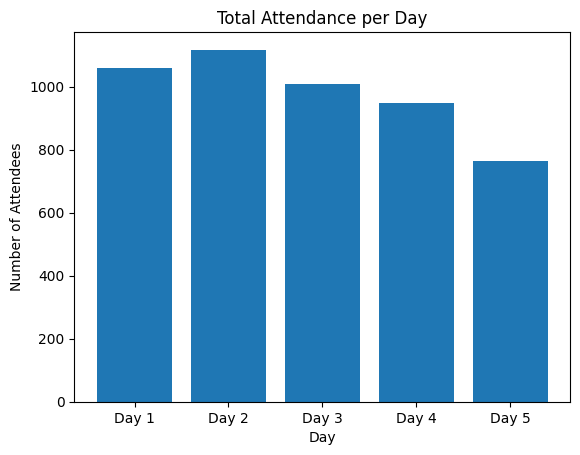

In [ ]:
attendance_counts = Attendence_report[['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']].apply(lambda x: x.str.count('✔️')).sum()
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
plt.bar(days, attendance_counts)
plt.xlabel('Day')
plt.ylabel('Number of Attendees')
plt.title('Total Attendance per Day')
plt.show()

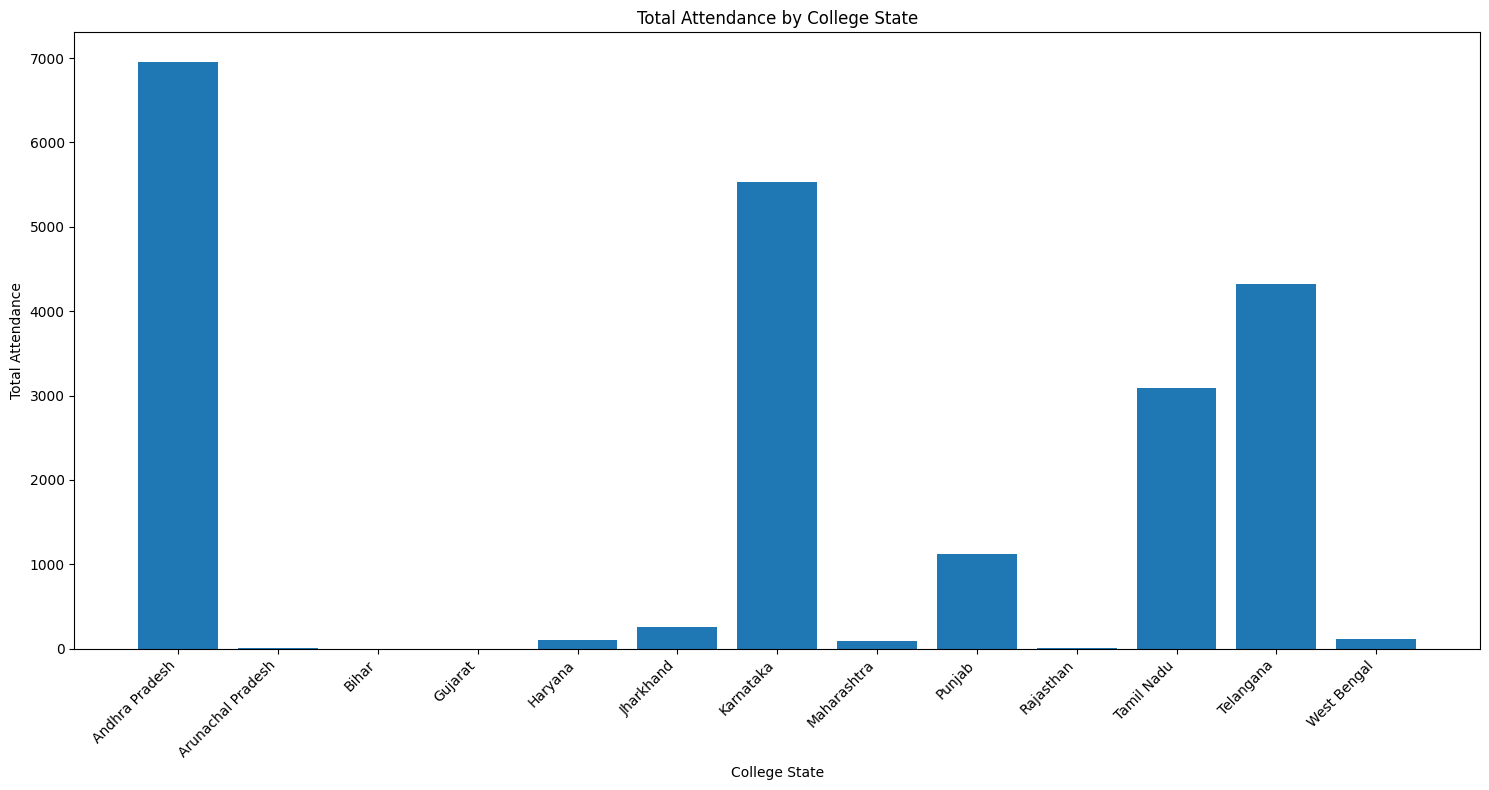

In [ ]:
# Merge df and Attendence_report on 'Email Id'
merged_df = pd.merge(df, Attendence_report, on='Email Id', how='left')

# Group by 'College State' and calculate the sum of 'Total_attendance'
state_total_attendance = merged_df.groupby('College State')['Total_attendance'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 8))
plt.bar(state_total_attendance['College State'], state_total_attendance['Total_attendance'])
plt.xlabel('College State')
plt.ylabel('Total Attendance')
plt.title('Total Attendance by College State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('raw_data_v0.1 - master.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' - ', '_').str.replace(' ', '_').str.replace('__', '_')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['unique_id'] = df['verified_email'].fillna(df['email_id']).fillna(df['whatsapp_number'])
df_sorted = df.sort_values('timestamp', ascending=False)
cleaned_df = df_sorted.drop_duplicates(subset=['unique_id']).copy()
for col in ['college_full_name', 'college_district', 'college_state', 'branch_name', 'full_name']:
    cleaned_df.loc[:, col] = cleaned_df[col].str.strip().str.lower()

cleaned_df.to_csv('cleaned_master.csv', index=False)

In [113]:
data = pd.read_csv('raw_data_v0.1 - master.csv')
data.head()

,Timestamp,Verified Email,Full Name,WhatsApp Number,Email Id,College Full Name,Branch Name,Year Of Pass - out,College District,College State
0,7/28/2025 19:30:55,ead_0001,Priyamvadha,mnu_0001,ead_0001,Swarna Bharathi Institute of science and techn...,DATA SCIENCE,2026 ( Present 4th Year ),Khammam,Telangana
1,7/28/2025 19:30:55,ead_0002,Sandeep,mnu_0002,ead_0002,Lovely Professional University,OTHERS,2025 ( RECENT PASS-OUTS ),Phagwara,Punjab
2,7/28/2025 19:30:59,ead_0003,Mohit,mnu_0003,ead_0003,Lovely Professional University,CSE,2026 ( Present 4th Year ),Phagwara,Punjab
3,7/28/2025 19:31:04,ead_0004,Kutukuppala,mnu_0004,ead_0004,Kutukuppala Bhanu Prasad,CSE,2026 ( Present 4th Year ),Jalandhar,Punjab
4,7/28/2025 19:31:09,ead_0005,Akshatha,mnu_0005,ead_0005,Bangalore Institute of technology,ARTIFICIAL INTELLIGENCE AND MACHINE LEARNING,2026 ( Present 4th Year ),Bangalore,Karnataka


In [118]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['unique_id'] = df['Verified Email'].fillna(df['Email Id']).fillna(data['WhatsApp Number'])
data_sorted = data.sort_values('Timestamp', ascending=False)
cleaned_df = data_sorted.drop_duplicates(subset=['unique_id']).copy()

for col in ['College Full Name', 'College District', 'College State', 'Branch Name', 'Full Name']:
    cleaned_df.loc[:, col] = cleaned_df[col].str.strip().str.lower()

cleaned_df.to_csv('Cleaned_data.csv', index=False)

In [120]:
dataset=pd.read_csv('/content/Cleaned_data.csv')
dataset

,Timestamp,Verified Email,Full Name,WhatsApp Number,Email Id,College Full Name,Branch Name,Year Of Pass - out,College District,College State,unique_id
0,2025-08-01 20:53:59,ead_0797,touqeer,mnu_0800,ead_0797,touqeer fathima,it,2028 ( Present 2rd Year ),kakinada,andhra pradesh,ead_0797
1,2025-08-01 20:53:46,ead_1110,chilukuri,mnu_1112,ead_1110,adityauniversity,data science,2028 ( Present 2rd Year ),kakinada,andhra pradesh,ead_1110
2,2025-08-01 20:52:34,ead_1139,kanneboina,mnu_1139,ead_1139,gouthami institute of technology and managemen...,cse,2026 ( Present 4th Year ),proddutur,andhra pradesh,ead_1139
3,2025-08-01 20:50:46,ead_0816,illapuram,mnu_0819,ead_0816,cmr institute of technology,ece,2025 ( RECENT PASS-OUTS ),medchal,telangana,ead_0816
4,2025-08-01 20:49:01,ead_1298,lekkala,mnu_1301,ead_1298,gouthami institute of technology and managemen...,ece,2026 ( Present 4th Year ),kadapa,andhra pradesh,ead_1298
...,...,...,...,...,...,...,...,...,...,...,...
1293,2025-07-28 19:31:30,ead_0045,adari,mnu_0045,ead_0045,vignan's institute of information technology,data science,2027 ( Present 3rd Year ),visakhapatnam,andhra pradesh,ead_0045
1294,2025-07-28 19:31:24,ead_0026,k,mnu_0026,ead_1300,maharaja institute of technology mysore,artificial intelligence and machine learning,2027 ( Present 3rd Year ),mandya,karnataka,ead_0026
1295,2025-07-28 19:31:22,ead_0023,sagar,mnu_0023,ead_0023,vijaya vittala institute of technology,artificial intelligence and machine learning,2027 ( Present 3rd Year ),bengaluru,karnataka,ead_0023
1296,2025-07-28 19:31:14,ead_0009,pirjade,mnu_0009,ead_0009,amc engineering college,computer science and business systems,2026 ( Present 4th Year ),bangalore,karnataka,ead_0009


In [121]:
report_b = dataset.groupby('College Full Name')['unique_id'].nunique().sort_values(ascending=False).reset_index(name='no._of_students')
report_b.columns = ['College Full Name', 'No. of Students']
report_b.to_csv('Collagewise_participation', index=False)

In [122]:
Collagewise_participation=pd.read_csv('/content/Collagewise_participation')
Collagewise_participation.head()

,College Full Name,No. of Students
0,lovely professional university,69
1,aditya university,58
2,pvkk institute of technology,48
3,sumathi reddy institute of technology for women,46
4,vemana institute of technology,46


In [123]:
dataset['College District'] = dataset['College District'].str.strip().str.lower()

dataset['College District'] = dataset['College District'].replace({
    'bengaluru':'bangalore',
    'banglore':'bangalore',
    'banglore urban':'bangalore',
    'bangalore rural':'bangalore',
    'bengaluru urban':'bangalore',
    'bengaluru rural':'bangalore',
    'banglore urban	':'bangalore',
    'bangalore rural':'bangalore',
    'bengaluru urban district':'bangalore',
    'rangareddy':'ranga reddy',
    'ranga reddy':'ranga reddy',
    'anantapur':'anathapuramu',
    'ananthapuram':'anathapuramu',
    'ananthapur':'anathapuramu',

})
report_c = dataset.groupby('College District')['unique_id'].nunique().sort_values(ascending=False).reset_index(name='student_count')
report_c.columns = ['College District', 'Student Count']
report_c.to_csv('Distric_Wise_report.csv', index=False)


In [124]:
Distric_Wise_report=pd.read_csv('/content/Distric_Wise_report.csv')
Distric_Wise_report.head(10)

,College District,Student Count
0,bangalore,229
1,coimbatore,103
2,anathapuramu,78
3,kakinada,59
4,kadapa,57
5,warangal,47
6,ranga reddy,46
7,hyderabad,43
8,guntur,40
9,medchal,35


In [126]:
report_d = dataset.groupby('College State')['unique_id'].nunique().sort_values(ascending=False).reset_index(name='no._of_students')
report_d.columns = ['College State', 'No. of Students']
report_d.to_csv('StateWise_report.csv', index=False)

In [127]:
StateWise_report=pd.read_csv('/content/StateWise_report.csv')
StateWise_report.head()

,College State,No. of Students
0,andhra pradesh,457
1,karnataka,297
2,telangana,254
3,tamil nadu,166
4,punjab,86


In [128]:
report_e = dataset.groupby('Branch Name')['unique_id'].nunique().sort_values(ascending=False).reset_index(name='student_count')
report_e.columns = ['Branch Name', 'Student Count']
report_e.to_csv('Branches_report.csv', index=False)

In [129]:
Branches_report=pd.read_csv('/content/Branches_report.csv')
Branches_report.head(50)

,Branch Name,Student Count
0,cse,460
1,data science,212
2,artificial intelligence and machine learning,178
3,ece,167
4,others,128
5,it,89
6,cyber security,25
7,computer science and business systems,21
8,eee,8
9,iot and cyber security including bct,8


In [130]:
dataset['Year Of Pass - out'] = dataset['Year Of Pass - out'].astype(str).str.extract(r'(\d{4})')
dataset['Year Of Pass - out'] = pd.to_numeric(dataset['Year Of Pass - out'], errors='coerce')

report_f = dataset.pivot_table(index='College Full Name', columns='Year Of Pass - out', values='unique_id', aggfunc='count', fill_value=0)
report_f = report_f.reset_index().rename_axis(None, axis=1)

report_f.to_csv('year_of_passout_vs_college_mapping.csv', index=False)

print("Report saved as year_of_passout_vs_college_mapping.csv")
print(report_f.head())

Report saved as year_of_passout_vs_college_mapping.csv
                                   College Full Name  2025  2026  2027  2028
0                          1am22cs100amceducation.in     0     1     0     0
1   abdhulkalam institutes of technology and science     0     1     0     0
2  abdhulkalam institution of technological sciences     0     1     0     0
3    abdul kalam institute of technological &science     0     1     0     0
4  abdul kalam institute of technological and sci...     0     1     1     0


In [131]:
year_of_passout_vs_college_mapping=pd.read_csv('/content/year_of_passout_vs_college_mapping.csv')
year_of_passout_vs_college_mapping.head(50)

,College Full Name,2025,2026,2027,2028
0,1am22cs100amceducation.in,0,1,0,0
1,abdhulkalam institutes of technology and science,0,1,0,0
2,abdhulkalam institution of technological sciences,0,1,0,0
3,abdul kalam institute of technological &science,0,1,0,0
4,abdul kalam institute of technological and sci...,0,1,1,0
5,abdul kalam institute of technological science,1,0,0,0
6,abdul kalam institute of technological sciences,0,6,2,0
7,abdul kalam institute of technology and science,0,1,0,0
8,abdul kalam institution of technology and science,0,1,0,0
9,abdulkalam institute of technological sciences,0,1,0,0


In [142]:
cleaned_df = pd.read_csv('Cleaned_data.csv')
attendance_report_df = pd.read_csv('Attendence.csv')
report_b = pd.read_csv('Collagewise_participation')
report_c = pd.read_csv('Distric_Wise_report.csv')
report_d = pd.read_csv('StateWise_report.csv')

In [143]:
total_unique_students = len(cleaned_df['unique_id'].unique())
top_5_colleges = report_b.head(5)
total_from_top_5_colleges = top_5_colleges['No. of Students'].sum()
cleaned_df.loc[:, 'Year Of Pass - out'] = cleaned_df['Year Of Pass - out'].astype(str).str.extract(r'(\d{4})')
most_common_passout_year = cleaned_df['Year Of Pass - out'].mode()[0]
top_3_colleges = report_b.head(3).to_string(index=False)
top_3_districts = report_c.head(3).to_string(index=False)
top_3_states = report_d.head(3).to_string(index=False)
attendance_columns = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
total_attendance_count = (attendance_report_df['Total_attendence']).sum()
avg_attendance_per_student = total_attendance_count / total_unique_students

In [162]:
print(f"Total unique students: {total_unique_students}")
print(f"Total students from top 5 colleges: {total_from_top_5_colleges}")
print(f"Most common pass-out year: {most_common_passout_year}")
print("\nTop 3 Colleges:")
print(top_3_colleges)
print("\nTop 3 Districts:")
print(top_3_districts)
print("\nTop 3 States:")
print(top_3_states)
print(f"\nOverall attendance stats (avg attendance per student): {avg_attendance_per_student:.2f}")

Total unique students: 1298
Total students from top 5 colleges: 267
Most common pass-out year: 2026

Top 3 Colleges:
             College Full Name  No. of Students
lovely professional university               69
             aditya university               58
  pvkk institute of technology               48

Top 3 Districts:
College District  Student Count
       bangalore            229
      coimbatore            103
    anathapuramu             78

Top 3 States:
 College State  No. of Students
andhra pradesh              457
     karnataka              297
     telangana              254

Overall attendance stats (avg attendance per student): 0.97


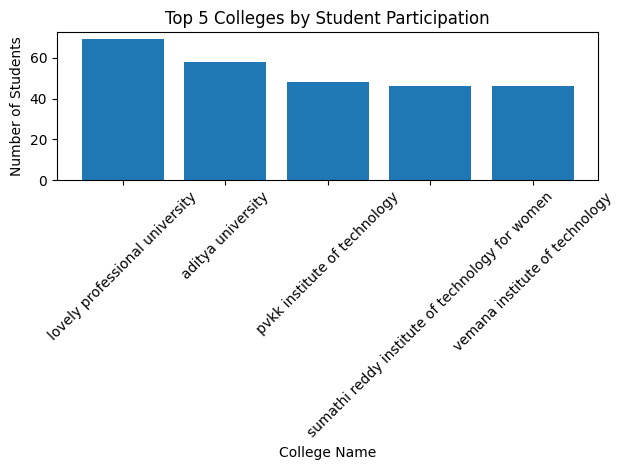

In [146]:
plt.bar(report_b['College Full Name'].head(5), report_b['No. of Students'].head(5))
plt.xlabel('College Name')
plt.ylabel('Number of Students')
plt.title('Top 5 Colleges by Student Participation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 3 Districts Participation')

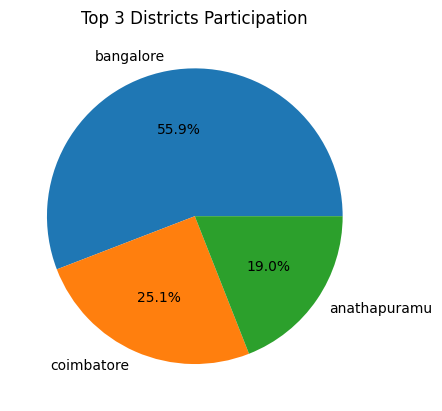

In [153]:
plt.pie(report_c['Student Count'].head(3), labels=report_c['College District'].head(3), autopct='%1.1f%%')
plt.title('Top 3 Districts Participation')

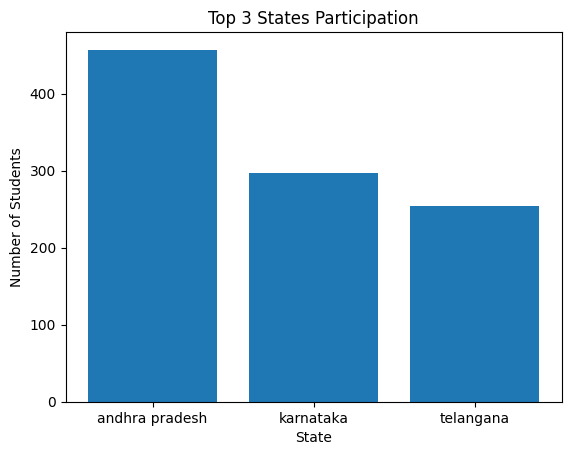

In [157]:
plt.bar(report_d['College State'].head(3), report_d['No. of Students'].head(3))
plt.xlabel('State')
plt.ylabel('Number of Students')
plt.title('Top 3 States Participation')
plt.show()

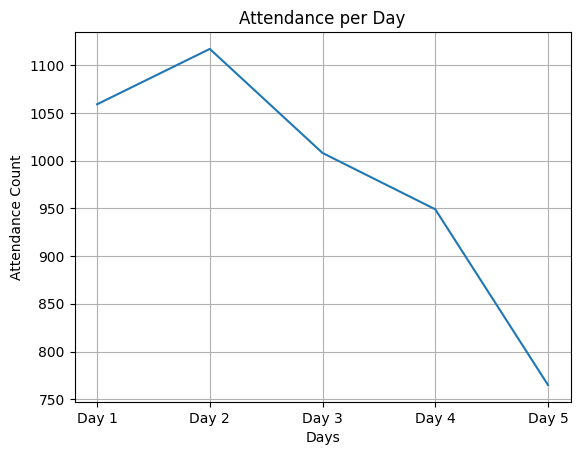

In [160]:
day_totals = Attendence_report[attendance_columns].apply(lambda x: (x == '✔️').sum())
plt.plot(attendance_columns, day_totals)
plt.xlabel('Days')
plt.ylabel('Attendance Count')
plt.title('Attendance per Day')
plt.grid(True)


([0, 1, 2, 3],
 [Text(0, 0, '2025'),
  Text(1, 0, '2026'),
  Text(2, 0, '2027'),
  Text(3, 0, '2028')])

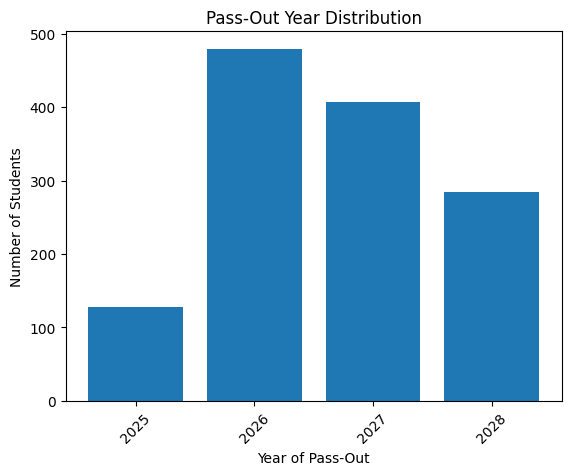

In [161]:
year_counts = cleaned_df['Year Of Pass - out'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year of Pass-Out')
plt.ylabel('Number of Students')
plt.title('Pass-Out Year Distribution')
plt.xticks(rotation=45)